### Import Package

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from models import ResNet18
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision


In [14]:
checkpoint = torch.load('./checkpoints/ResNet18_ckpt.pth')
net = ResNet18()
net.load_state_dict(checkpoint['net'])
net.eval()

C:\Users\10317\AppData\Local\Temp\ipykernel_12376\1111006082.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('./checkpoints/ResNet18_ckpt.pth')


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

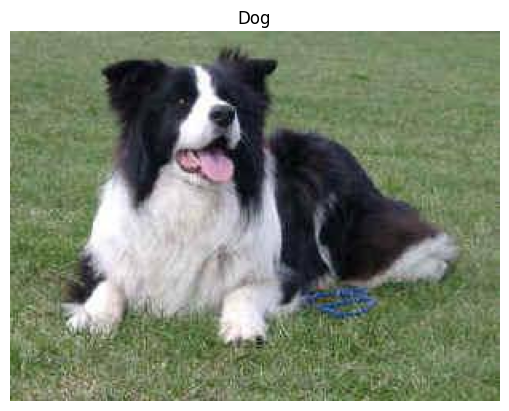

In [15]:
image1 = Image.open('3.jpg')

# 展示图片
plt.imshow(image1)
plt.title('Dog')
plt.axis('off')  # 不显示坐标轴
plt.show()


In [16]:

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

input_tensor = transform(image1).unsqueeze(0)

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# 第一个卷积层
net.conv1.register_forward_hook(get_activation('conv1'))

# 每个残差块的第一个卷积层
net.layer1[0].conv1.register_forward_hook(get_activation('layer1_conv1'))
net.layer2[0].conv1.register_forward_hook(get_activation('layer2_conv1'))
net.layer3[0].conv1.register_forward_hook(get_activation('layer3_conv1'))
net.layer4[0].conv1.register_forward_hook(get_activation('layer4_conv1'))

with torch.no_grad():
    net(input_tensor)

conv1_output = activation['conv1'].squeeze(0).cpu() 
# 各残差块第一个卷积层输出
layer_outputs = []
for layer_name in ['layer1_conv1', 'layer2_conv1', 'layer3_conv1', 'layer4_conv1']:
    layer_outputs.append(activation[layer_name].squeeze(0).cpu())
 


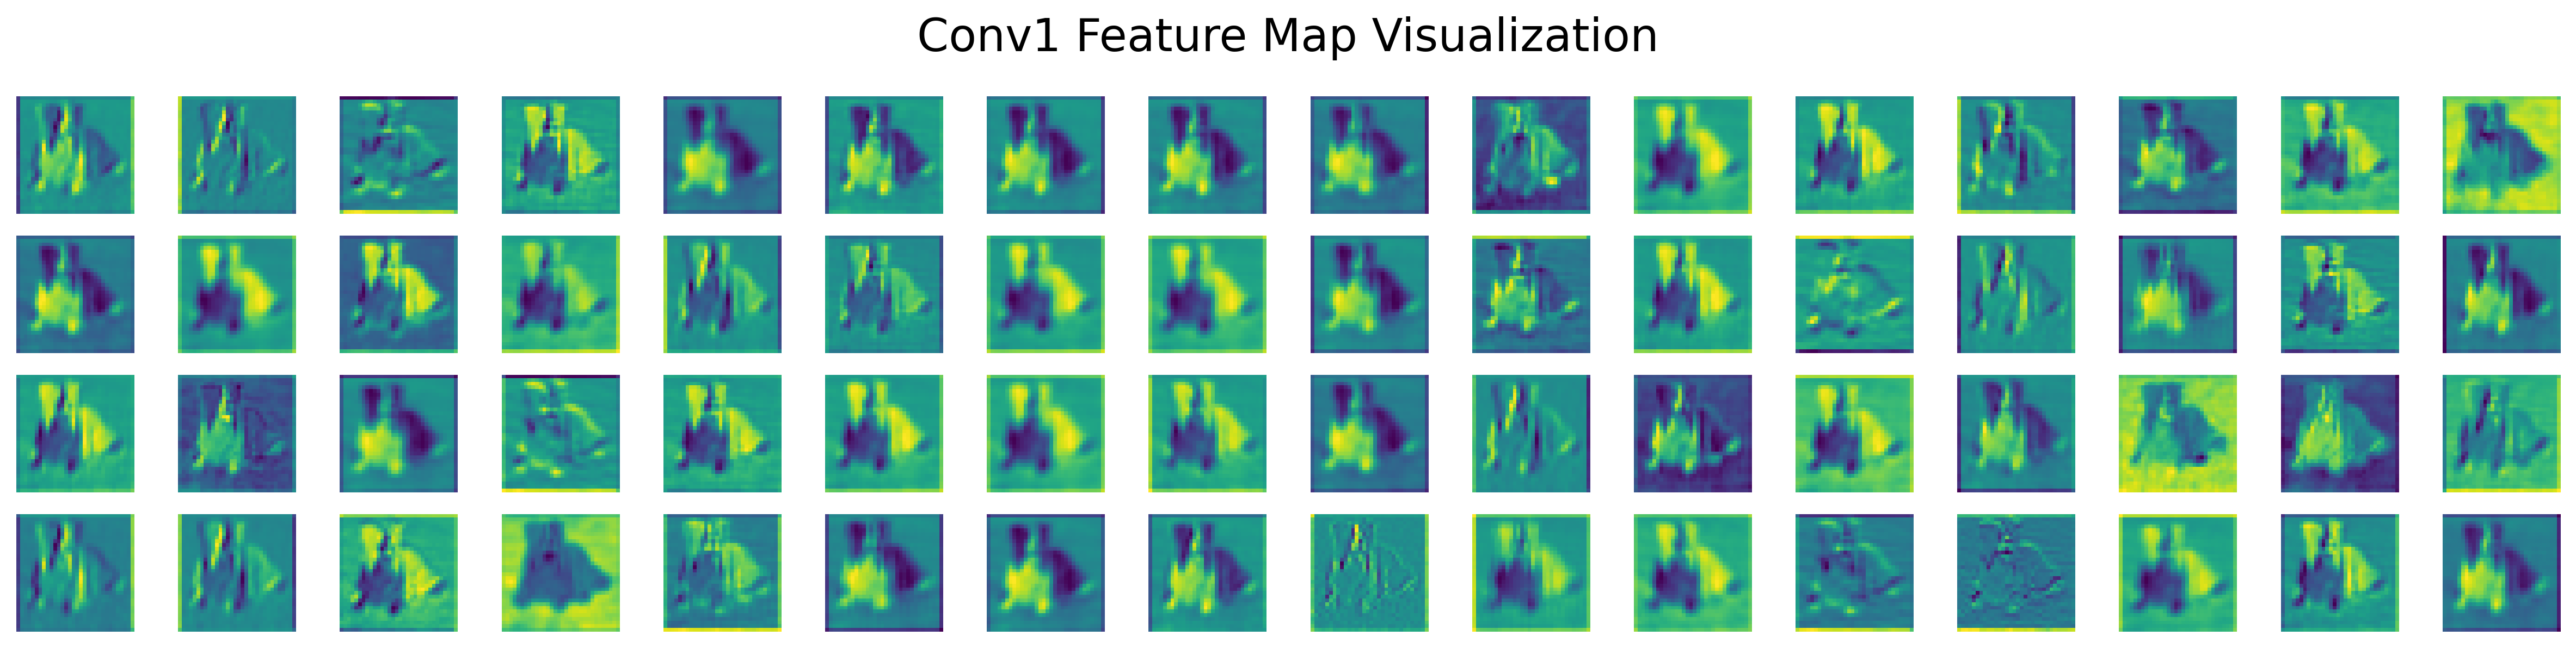

In [17]:
num_channels = conv1_output.shape[0]
plt.figure(figsize=(16, 4), dpi=300)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(conv1_output[i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()

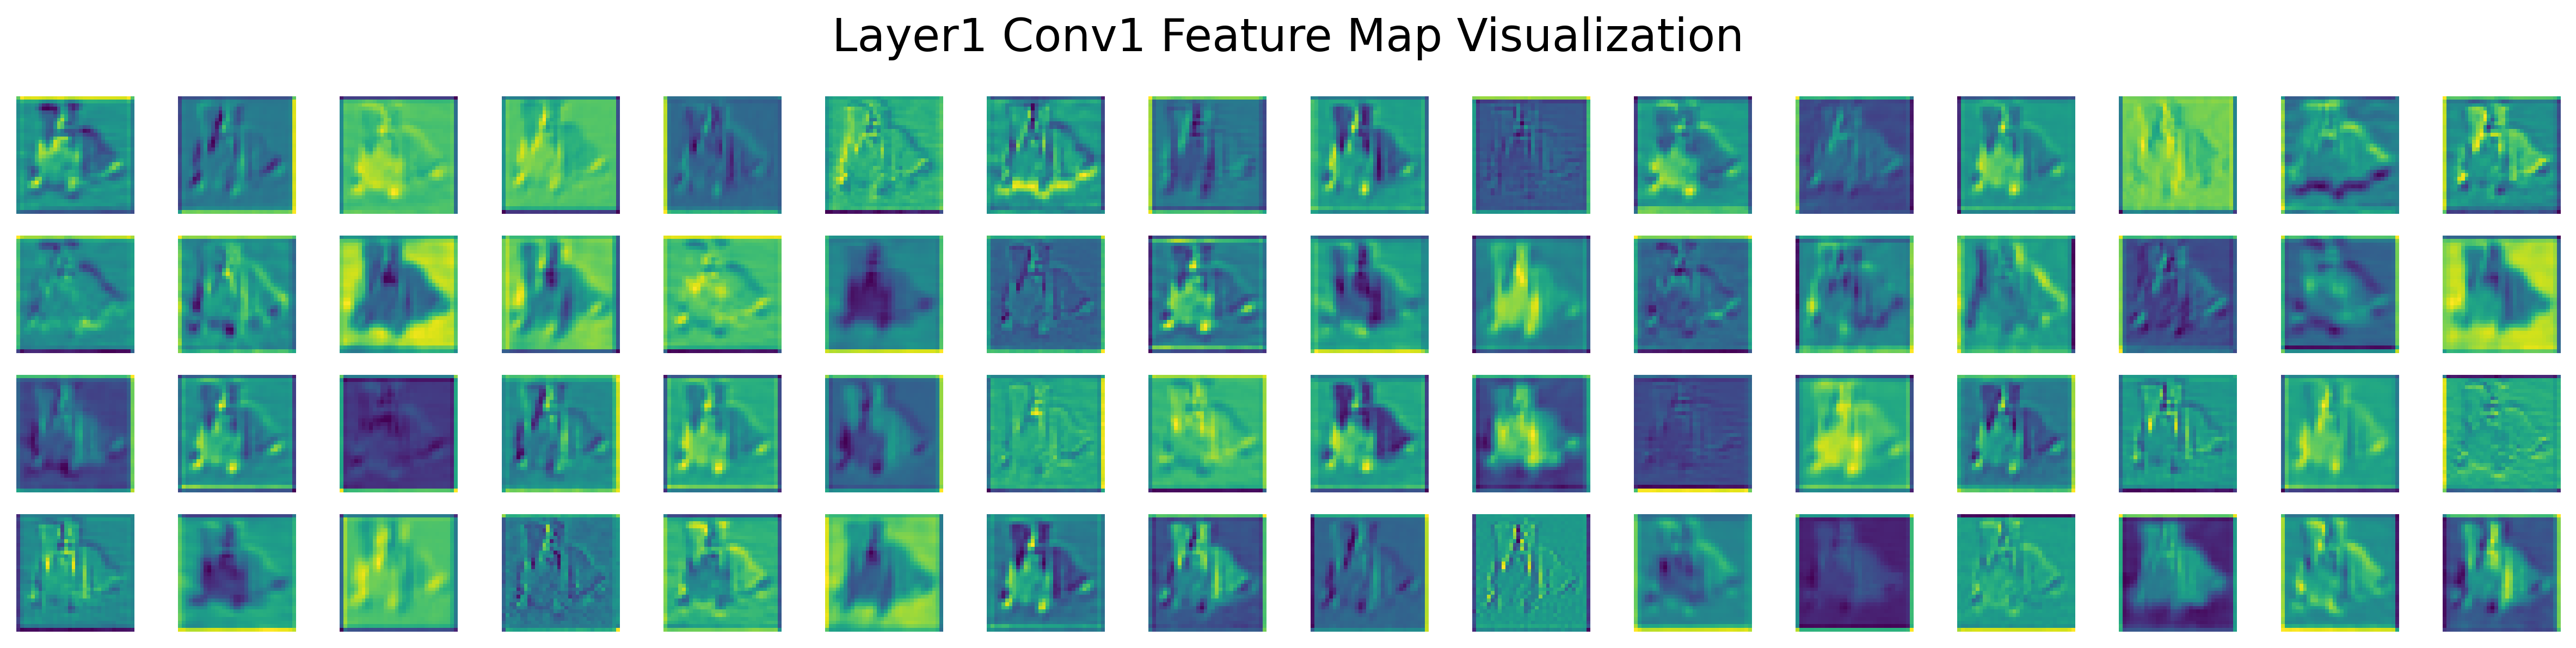

In [18]:
max_channels = 64
num_channels = min(layer_outputs[0].shape[0], max_channels)

plt.figure(figsize=(16, 4), dpi=300)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(layer_outputs[0][i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Layer1 Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()

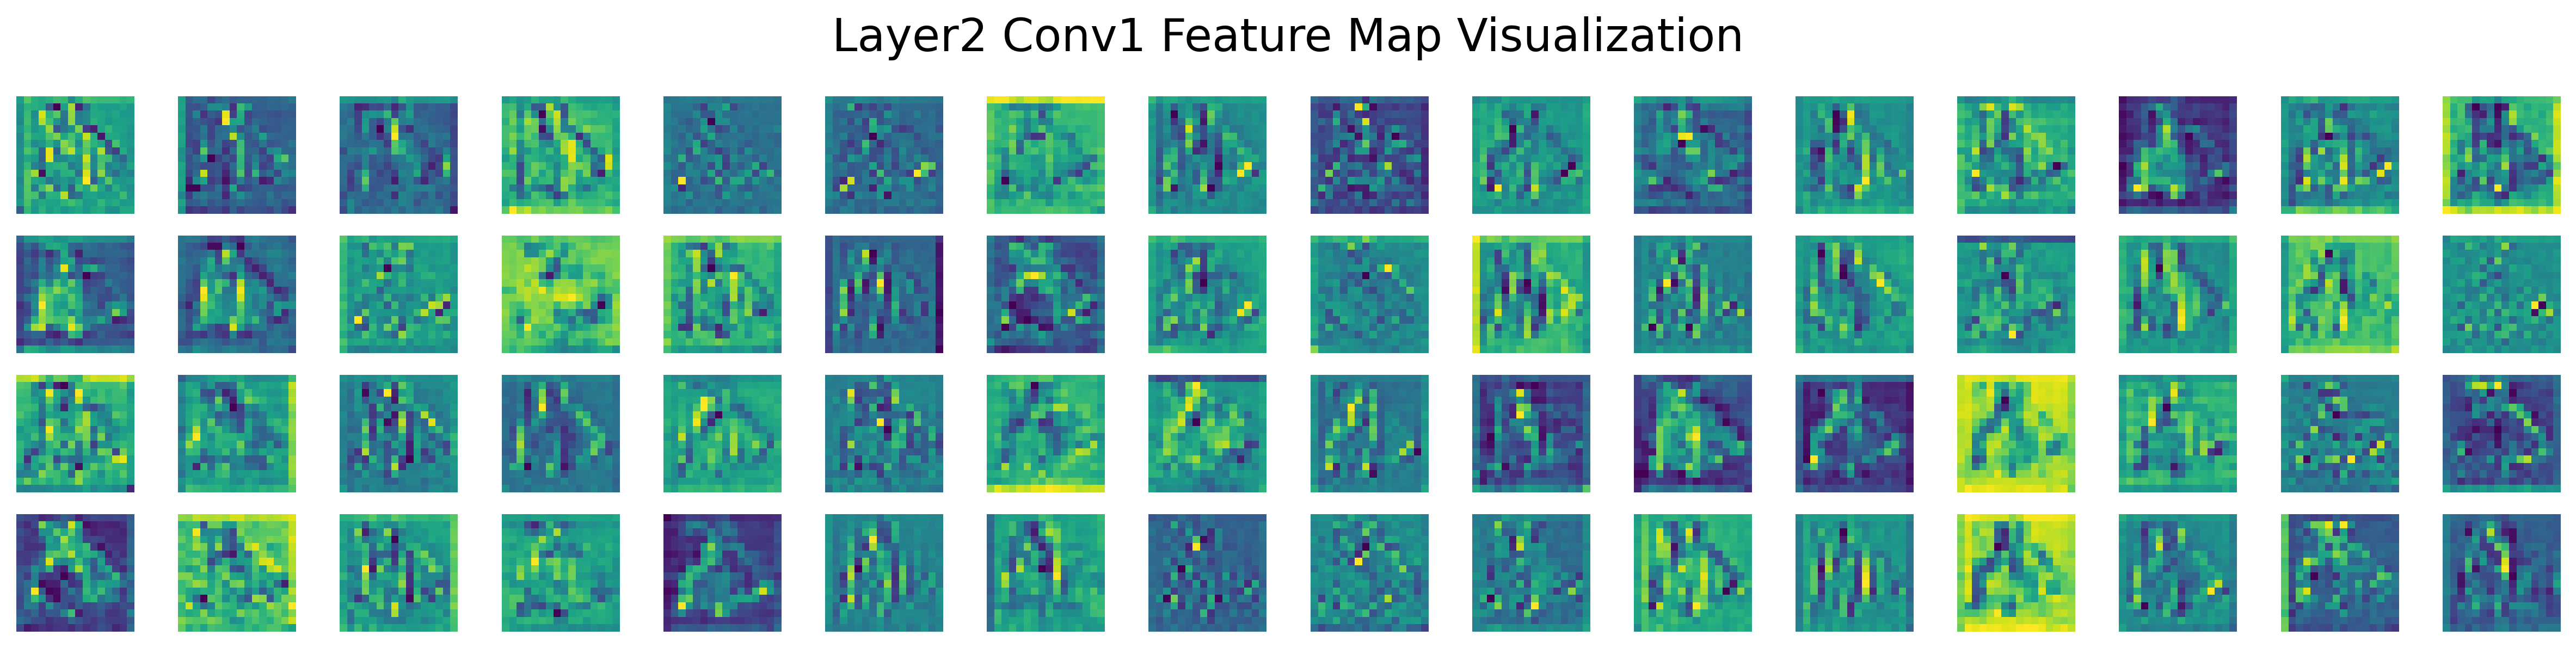

In [19]:
max_channels = 64
num_channels = min(layer_outputs[1].shape[0], max_channels)

plt.figure(figsize=(16, 4), dpi=300)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(layer_outputs[1][i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Layer2 Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()

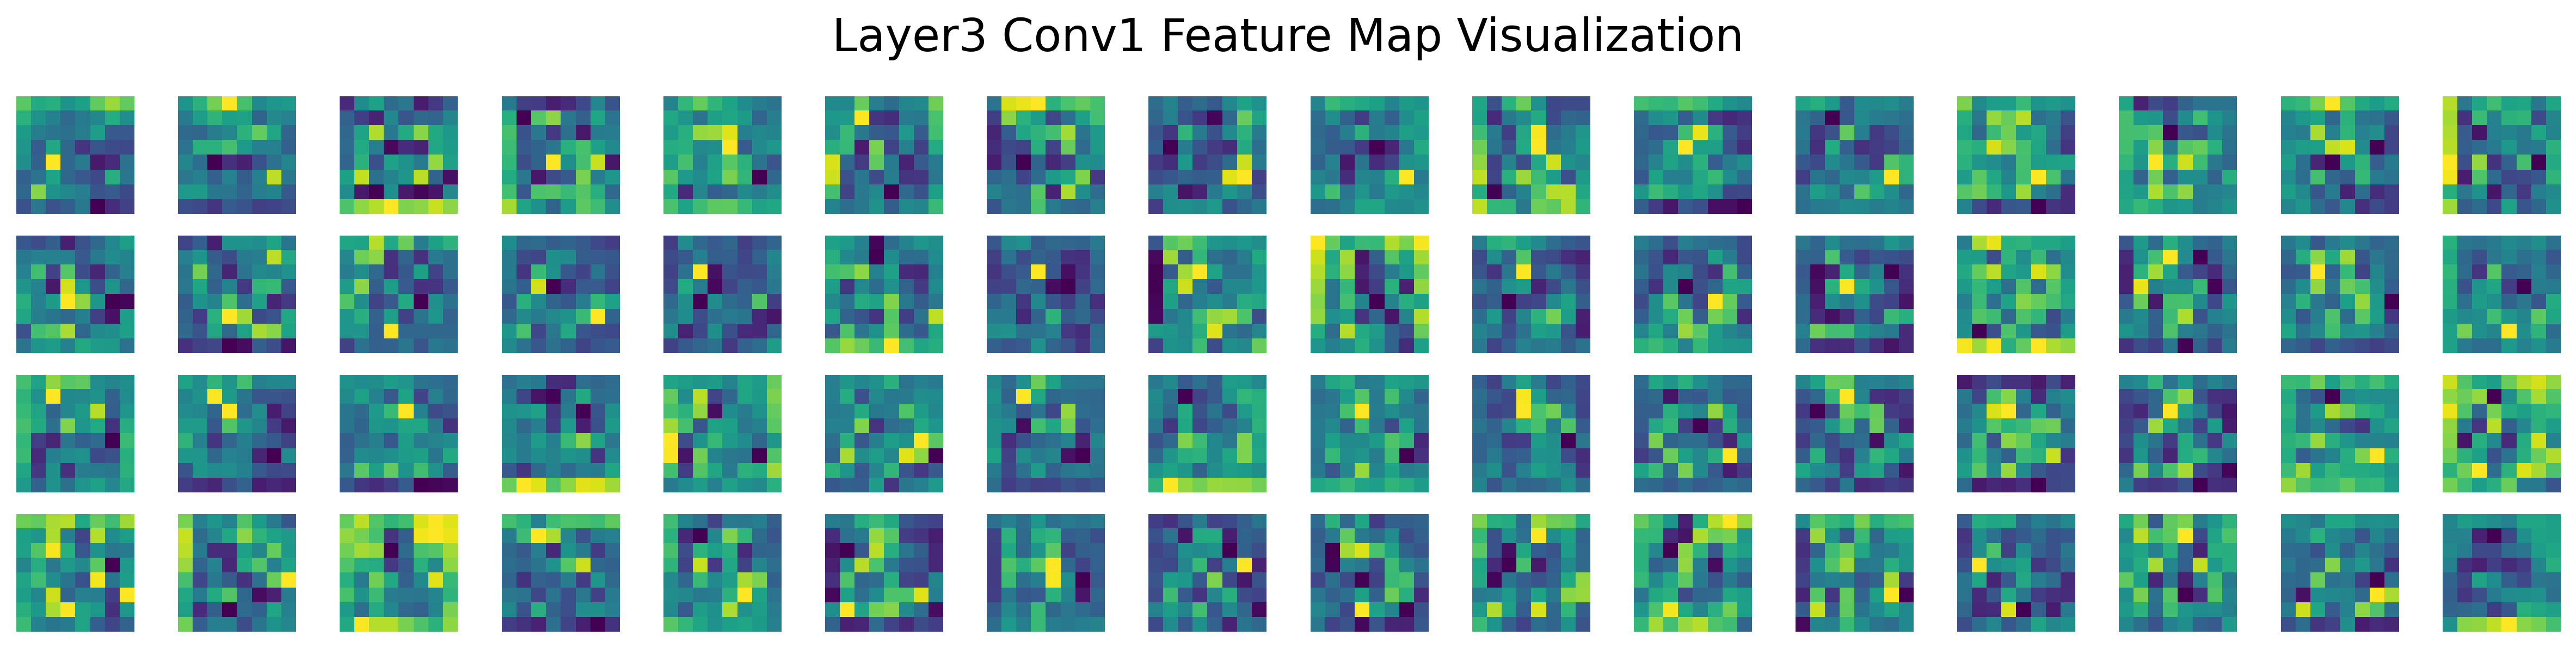

In [20]:
max_channels = 64
num_channels = min(layer_outputs[2].shape[0], max_channels)

plt.figure(figsize=(16, 4), dpi=300)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(layer_outputs[2][i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Layer3 Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()

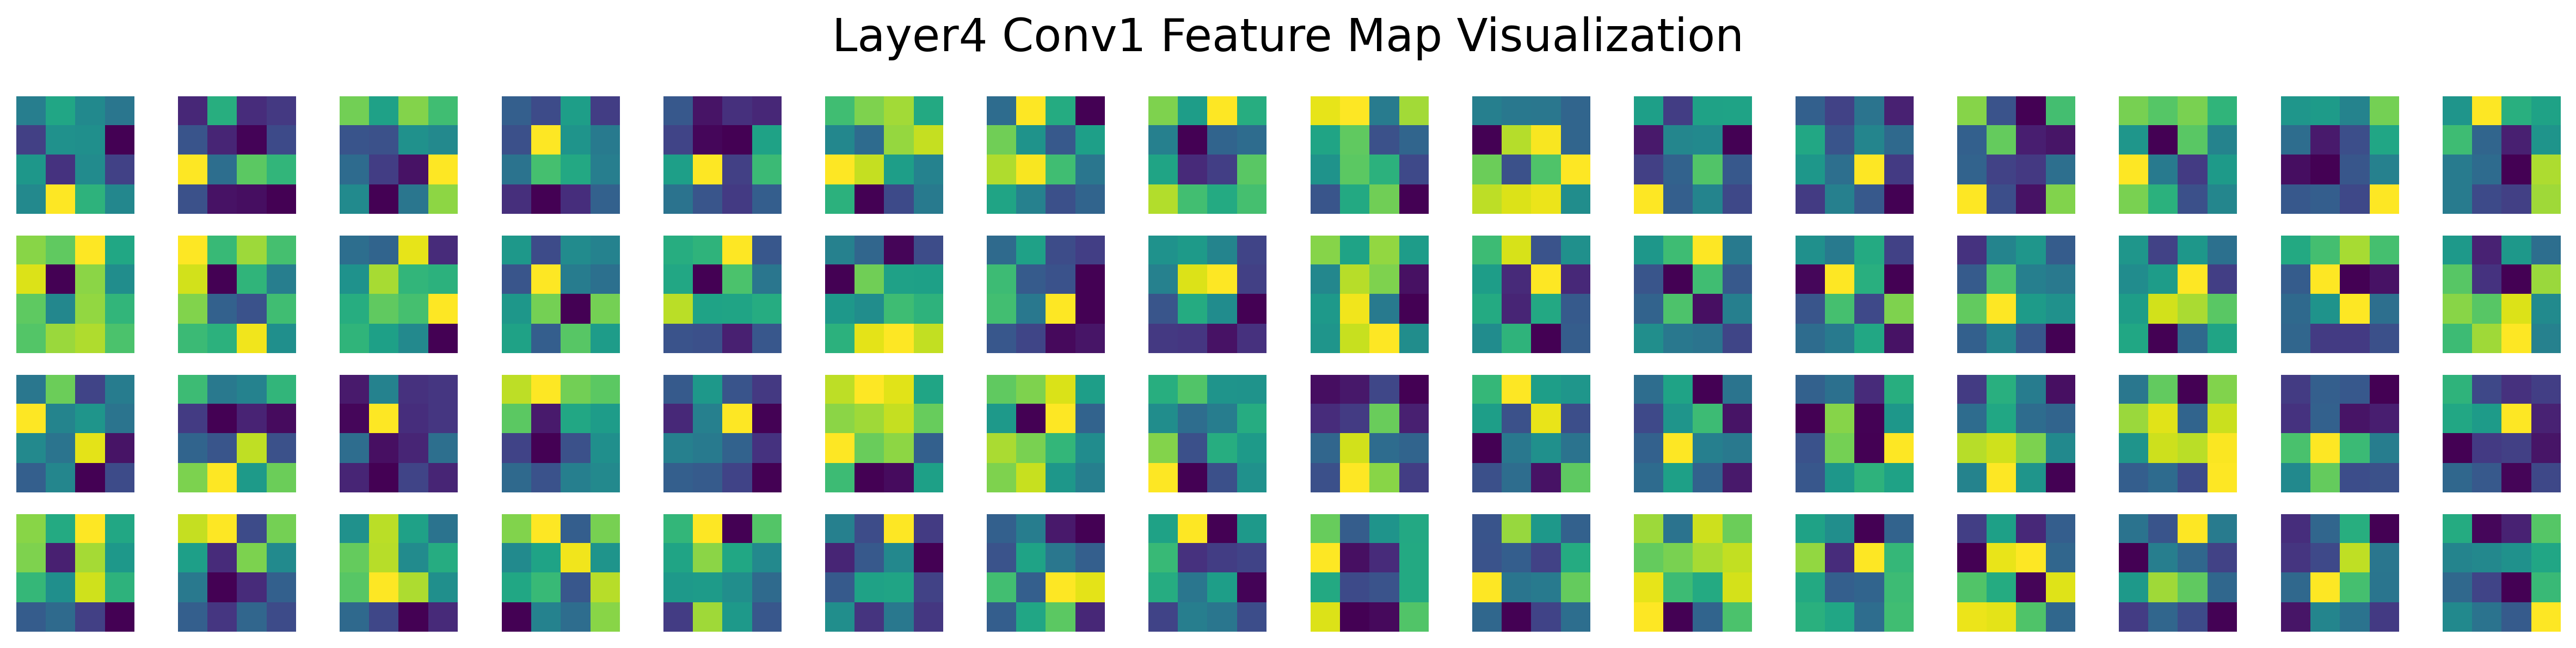

In [21]:
max_channels = 64
num_channels = min(layer_outputs[3].shape[0], max_channels)

plt.figure(figsize=(16, 4), dpi=300)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(layer_outputs[3][i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Layer4 Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()